In [3]:
# Using IPython.display.Audio to play jnt.wav audio file
import IPython.display as ipd
ipd.Audio("jnt.wav")

In [4]:
# Using IPython.display.Audio to play jntslow.wav audio file
import IPython.display as ipd
ipd.Audio("jntslow.wav")


jnt memohon maaf
[[-511 -511]
 [-515 -515]
 [-516 -516]
 ...
 [-235 -235]
 [-295 -295]
 [-342 -342]]
[[-418 -418]
 [-599 -599]
 [-524 -524]
 ...
 [  -4   -4]
 [  -3   -3]
 [   0    0]]

Audio visualization: 


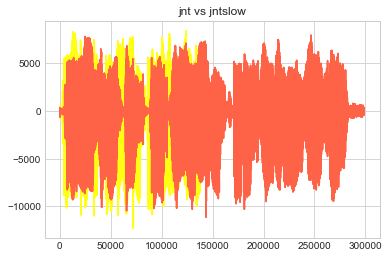

None

jnt vs jntslow

[[   0.   inf   inf   inf   inf   inf   inf   inf   inf   inf   inf]
 [  inf   93.  346.  439.  692.  860. 1112. 1280. 1532. 1775. 2027.]
 [  inf  253.   93.  253.  253.  338.  339.  424.  425.  435.  436.]
 [  inf  346.  346.  186.  439.  421.  590.  507.  676.  668.  687.]
 [  inf  506.  346.  346.  186.  271.  272.  357.  358.  368.  369.]
 [  inf  665.  347.  505.  187.  270.  270.  354.  354.  363.  363.]
 [  inf  824.  348.  506.  188.  271.  270.  354.  354.  363.  363.]
 [  inf  983.  349.  507.  189.  272.  270.  354.  354.  363.  363.]
 [  inf 1142.  350.  508.  190.  273.  270.  354.  354.  363.  363.]
 [  inf 1300.  352.  508.  192.  273.  271.  353.  354.  362.  363.]
 [  inf 1459.  353.  511.  193.  276.  271.  355.  353.  362.  362.]]

J&T memohon maaf vs J&T memohon maaf slow


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
#Read these audio clips and visualize them using matplotlib

from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Read stored audio files for comparison 
fs1, data = wavfile.read("jnt.wav")
fs2, data_slow = wavfile.read("jntslow.wav")
print("\nJ&T memohon maaf")
print(data)
print(data_slow)
memohonmaaf = np.amax(data, axis=1)
memohonmaafslow = np.amax(data_slow, axis=1)

#visualization
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# Set plot style
plt.style.use('seaborn-whitegrid')

# Create subplots
maaf_subplot = plt.subplot(1, 1, 1)
maaf_subplot.plot(data, color='#FFFF14')
maaf_subplot.plot(data_slow, color='#FF6347')
print("\nAudio visualization: ")
plt.title("jnt vs jntslow")

# Display created figure
fig1=plt.show()
display(fig1)

import wave
import numpy as np

#"memohon" dan "maaf"
jnt = wave.open("jnt.wav", "r")
jnt_sound = jnt.readframes(-1)

jnt_slow = wave.open("jntslow.wav", "r")
jnt_soundslow = jnt_slow.readframes(-1)

#print(dtw(jnt_sound[:10], jnt_soundslow[:10]))
jnt_maaf = np.frombuffer(jnt_sound, dtype='int16')
jnt_maafslow = np.frombuffer(jnt_soundslow, dtype='int16')


def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

print("jnt vs jntslow\n")
print(dtw(jnt_sound[:10], jnt_soundslow[:10]))


# calculate the distance between the different time series
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

print("\nJ&T memohon maaf vs J&T memohon maaf slow")
distance = fastdtw(memohonmaaf, memohonmaafslow, dist=euclidean)
print("\nThe distance between the two clips: " + str(distance))